# **Taller 3: clasificación de especies de iris usando K-vecinos más cercanos.**

**Curso: 09481 - Inteligencia Artificial.**

**Universidad Icesi.**

**Profesor: Breyner Posso.**

**Estudiantes: Julian Bolaños y Juan Pablo Sanín**

# 0. Importar librerías.

In [6]:
#Vamos a importar las librerías que vamos a utilizar.

import pandas as pd                #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos. 
#from google.colab import files     #Esta librería nos sirve para cargar archivos desde el disco duro.

from sklearn.model_selection import train_test_split #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler       #Útil para escalar los atributos de entrada.
from sklearn import neighbors  #Permite usar KNN.
from sklearn import metrics    #Permite calcular algunas métricas de desempeño.

from copy import deepcopy      #Permite hacer copias profundas. 

# 1. Cargar datos.

In [5]:
#Primero vamos a descargar el archivo "iris.csv" en nuestra máquina local desde Moodle o desde esta ruta: https://www.kaggle.com/uciml/iris

#Ahora cargamos en Google Colab el archivo que tiene el conjunto de datos "iris.csv"
#files.upload()  #Nota: si este comando falla, revise que su navegador permite el almacenamiento de cookies. 


In [3]:
#Vamos a utilizar el dataset iris (https://www.kaggle.com/datasets/uciml/iris)
# Vamos a leer el conjunto de datos en un dataframe de pandas.
df = pd.read_csv('iris.csv') #Ruta completa a la ubicación del archivo de interés.

# **EJERCICIOS PROPUESTOS TALLER 3.**

## **Ejercicio 1.**

Para el conjunto de datos iris, ¿cuál sería la exactitud (accuracy) de línea base (baseline)?

## **Ejercicio 2.**

Para la función metrics.classification_report consulte qué representan los valores entregados.

## **Ejercicio 3.**

Normalice los atributos, entrene un modelo con los atributos normalizados, pruebe este modelo tanto con los datos de entrenamiento y prueba, obtenga las métricas de desempeño por clase (matriz de confusión, exactitud, precisión, sensibilidad, especificidad y F1), obtenga la exactitud general y compare con los resultados obtenidos mediante el clasificador entrenado en la sesión de Taller.

### Separación atributo-target

Se separan las columnas de nuestro dataframe para tener los atributos en una variable y nuestro target en otra

In [19]:
#Separación de atributos y target
nombre_de_la_variable_de_salida='Species'
nombre_de_las_variables_de_entrada = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']


df_y = pd.get_dummies(df[nombre_de_la_variable_de_salida])
df_x = deepcopy(df[nombre_de_las_variables_de_entrada])

### Normalización

Ahora, se pasa al proceso de normalización de los diferentes atributos. Se empleará la técnica de: ***min - max scaling***

Descripción del método: https://deepchecks.com/glossary/normalization-in-machine-learning/

In [5]:
#Normalización de atributos
df_x_normalized = (df_x-df_x.min())/(df_x.max()-df_x.min())
df_x_normalized

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


### División datos de prueba

Con los atributos normalizados se pasa a dividir los mismos en datos de entrenamiento para el modelo y datos de prueba.

In [8]:
#División de datos en conjunto de entrenamiento y prueba
mezclar_los_datos       = True 
valor_semilla_aleatoria = 5

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.8  
particion_para_pruebas       = 1.0-particion_para_entrenamiento 

df_x_normalized_train, df_x_normalized_test, df_y_train, df_y_test = train_test_split(df_x_normalized, 
                             df_y,
                             test_size=particion_para_pruebas, 
                             random_state=valor_semilla_aleatoria, 
                             shuffle=mezclar_los_datos)

### Entrenamiento con datos normalizados

Se pasa a entrenar un modelo usando los datos recientemente normalizados

In [9]:
k   = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_normalized_train, df_y_train)

KNeighborsClassifier()

In [10]:
#Predicción para datos de entrenamiento
y_pred_train = knn.predict(df_x_normalized_train)
y_pred_train

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0,

In [11]:
#Predicción para datos de prueba
y_pred_test = knn.predict(df_x_normalized_test)
y_pred_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

### Métricas

A continuación se plantean métricas de desempeño por clase para el modelo entrenado con datos normalizados.

Primero se definen una serie de funciones que nos permitirán general mas métricas con mayor facilidad.

In [16]:
y_train = df_y_train.values

def cm_multi (y,y_pred):
  cm_m = metrics.confusion_matrix(one_hot_to_label_encoding(y), one_hot_to_label_encoding(y_pred))
  return cm_m

def one_hot_to_label_encoding(y_one_hot):
  """
  Esta función convierte un arreglo numpy y_one_hot, correspondiente a una matriz de 
  m observaciones por n clases de tipo binario, en un vector columna y_label_encoded
  de m filas cuyos elementos pueden tomar valores entre 0 y n-1. En ese caso
  0 corresponde a la primera categoría, 1 a la segunda categoría, y así
  sucesivamente. 
  """
  rows,cols=y_one_hot.shape            #Obtengo las dimensiones del arreglo.
  y_label_encoded = np.zeros((rows,1)) #Inicializo el arreglo de salida en ceros. 
  for i in range(cols): #Para todas las categorías (aunque estrictamente esto puede dejarse como range(1,cols,1), pues i=0 no hace nada. )
    y_label_encoded += i*y_one_hot[:,i].reshape((-1,1))  #Esto presume que la primera categoría se codifica como 0, 
                                                         #la siguiente como 1, etc...
  return y_label_encoded

#### 1. Matriz de Confusión

Clase 0:
Iris-setosa
Clase 1:
Iris-versicolor
Clase 2:
Iris-virginica


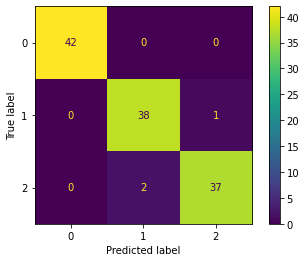

In [22]:
#Matriz de confusión para datos de entrenamiento
cm_train = cm_multi(y_train, y_pred_train)
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train)
disp_1.plot()

for i in range(len(df_y.columns)):
    print('Clase %d:' % i)
    print(df_y.columns[i])

Clase 0:
Iris-setosa
Clase 1:
Iris-versicolor
Clase 2:
Iris-virginica


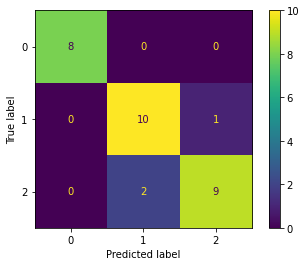

In [26]:
#Matriz de confusión para datos de prueba
y_test = df_y_test.values
cm_test = cm_multi(y_test, y_pred_test)
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test)
disp_1.plot()

for i in range(len(df_y.columns)):
    print('Clase %d:' % i)
    print(df_y.columns[i])

#### 2. Métricas estadísticas

In [25]:
#Métricas estadísticas para datos de entrenamiento
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120



In [27]:
#Métricas estadísticas para datos de prueba
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



#### 3. Exactitud general

In [28]:
y_complete = np.append(y_train, y_test)
y_pred_complete = np.append(y_pred_train, y_pred_test)

accuaracy = metrics.accuracy_score(y_complete, y_pred_complete)
print('Accuaracy of model: ', accuaracy)

Accuaracy of model:  0.9733333333333334


#### 4. Comparación con modelo inicial

Nuestro modelo inicial contaba con una precisión del 98.22%, mientras que este nuevo modelo entrenado con datos normalizados, tuvo una precisión menor: 97.33%

## **Ejercicio 4:**

Entrene y evalúe clasificadores KNN usando los atributos no normalizados para valores de K={1,3,7,9,11,13,15}. De acuerdo con los resultados obtenidos, ¿qué valor de K recomendaría?. Tenga en cuenta evaluar tanto con los datos de entrenamiento como de prueba.

## **Ejercicio 5:**

Entrene y evalúe clasificadores KNN usando los atributos normalizados para valores de K={1,3,7,9,11,13,15}. De acuerdo con los resultados obtenidos, ¿qué valor de K recomendaría?. Compare los resultados obtenidos en este punto con los obtenidos en el Ejercicio 4. Tenga en cuenta evaluar tanto con los datos de entrenamiento como de prueba.

## **Ejercicio 6.**

Encuentre un modelo de clasificación KNN que utilice solo tres atributos y cuyo desempeño sea igual o mejor que el modelo que usa cuatro atributos. Decida si es conveniente normalizar o no los atributos. Utilice diferentes valores de K. Para comparar varios modelos genere diferentes métricas de desempeño.
Al final indique, ¿por qué escogió esos atributos?, de los modelos entrenados ¿cuál escogería y por qué? ¿qué métricas de desempeño reportaría a un cliente y por qué?

## **Ejercicio 7.**

Encuentre un modelo de clasificación KNN que utilice solo dos atributos y cuyo desempeño sea comparable con el modelo que usa cuatro atributos. Decida si es conveniente normalizar o no los atributos. Utilice diferentes valores de K. Para comparar varios modelos genere diferentes métricas de desempeño.
Al final indique, ¿por qué escogió esos atributos?, de los modelos entrenados ¿cuál escogería y por qué? ¿qué métricas de desempeño reportaría a un cliente y por qué?

## **Ejercicio 8.**

¿Qué valores puede tomar el hiperparámetro metric? ¿Cuál es la distancia que utiliza por defecto el clasificador KNN?
¿Qué valores puede tomar el hiperparámetro weight y cuál podría ser su utilidad?

# **FIN**

# **Metodología**

1. Desarrolle las Preguntas propuestas en el Taller 3 de forma individual.

2. Después de la sesión de Taller 3, suba a Intu el archivo con la solución a las preguntas con nombre en el siguiente formato:

Taller_3_Apellido-Nombre.ipynb

3. Resuelva los Ejercicios Propuestos (en grupos de máximo 2 personas) en un nuevo notebook de Jupyter y suba el archivo a Intu hasta el próximo miércoles 21 de septiembre a las 7:00 am (antes del inicio de la clase). Utilice el siguiente formato para el nombre del archivo.

Ejercicios_Taller_2_Apellido-Nombre_Apellido-Nombre.ipynb

4.	Recuerde consignar los nombres de los integrantes dentro del notebook.

5.	Algunos grupos serán llamados al azar durante la clase del miércoles 21 de septiembre para realizar la presentación de alguno (s) de los puntos.

6. La nota del Taller 3 se asignará así:

- Preguntas Taller 2 (20%)

- Ejercicios Taller 2 (80%)
